<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/evaluate_aging_algorithm_with_varying_bits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
from collections import deque
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Algoritmos

In [2]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)
      molduras.append(pagina)

  return faltas_de_pagina


def aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits=None):
    if qtd_bits is None:
      qtd_bits = qtd_molduras
    molduras = []
    idade_paginas = []
    faltas_de_pagina = 0

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1
            idade_paginas[indice_pagina] |= 1 << (qtd_bits - 1)
        else:
            faltas_de_pagina += 1
            idade_paginas = [idade >> 1 for idade in idade_paginas]
            if len(molduras) == qtd_molduras:
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_bits - 1)
            else:
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_bits - 1))
    return faltas_de_pagina


# FIFO vs Aging

In [3]:
def experimento_fifo_vs_aging(qtd_referencias, qtd_paginas, max_molduras = 64):
    paginas  = [i for i in range(qtd_paginas)]
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # tamanho_molduras = [2**i for i in range( int(math.log2(max_molduras)) + 1) ] # se max_molduras == 16, entao [2^0, 2^1 , 2^2, 2^3]
    tamanho_molduras = [i for i in range(1, max_molduras+1)]
    fifo_acumulate = []
    aging_acumulate = []
    # print('molduras: ', tamanho_molduras)

    for tamanho_moldura in tamanho_molduras:
        fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))
        aging_acumulate.append(aging_bits(referencias_as_paginas, tamanho_moldura))

    return fifo_acumulate, aging_acumulate, tamanho_molduras


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[985, 967, 956, 934, 919, 910, 892, 878, 863, 843, 833, 817, 806, 790, 774, 759, 742, 723, 705, 686, 679, 668, 646, 633, 621, 602, 588, 579, 563, 545, 531, 514]
[985, 968, 954, 935, 918, 906, 892, 873, 861, 846, 831, 819, 806, 788, 774, 759, 740, 721, 707, 685, 673, 660, 641, 630, 613, 591, 574, 562, 549, 535, 521, 509]


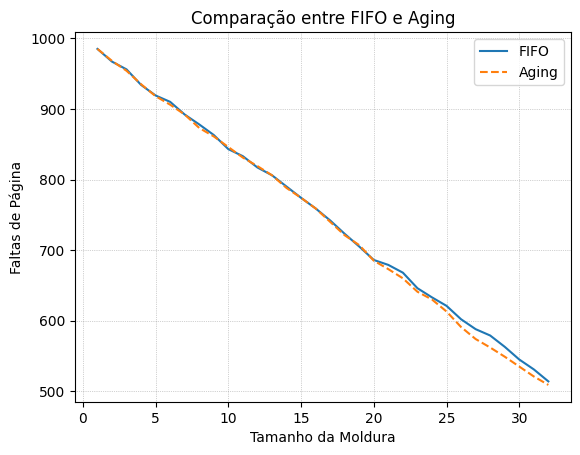

In [4]:
fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = 1000, qtd_paginas = 64, max_molduras=32)
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()


# Gráfico Médio


In [32]:
num_experiements = 100
qtd_paginas = 64
qtd_referencias = 1000
max_molduras = 32

paginas = np.arange(qtd_paginas)
m_r_fifo = np.zeros((num_experiements, max_molduras))
m_r_aging = np.zeros((num_experiements, max_molduras))

for i in range(num_experiements):
    print(f"\ri: {i}", end='')
    for j in range(1, max_molduras+1):
        referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
        fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = qtd_referencias, qtd_paginas = qtd_paginas, max_molduras=max_molduras)
        m_r_fifo[i, j-1] = fifo_array[j-1]
        m_r_aging[i, j-1] = aging_array[j-1]



i: 99

medias_fifo: [985.29 969.27 953.34 937.44 922.72 906.08 893.38 877.   861.11 844.02
 827.08 814.93 797.28 784.22 765.98 752.54 735.43 722.83 705.79 688.84
 676.72 662.05 643.67 627.69 611.97 600.16 581.92 571.66 554.3  541.26
 523.08 510.82]
desvios_padrao_fifo: [ 3.91738433  5.41267956  6.6816465   7.80425525  8.62331723  8.7723201
 10.12401106  9.23255111  9.54766464 11.84903372 11.74366212 11.53885176
 11.72696039 13.08860573 13.67039136 14.2845511  13.91420497 15.28597723
 15.81410446 14.05540465 14.25698425 15.96018484 13.18715663 14.87460588
 14.57083045 16.08273609 17.56341652 14.35285337 14.85227255 16.28104419
 15.6170932  15.08269207]
medias_aging: [985.29 969.24 953.27 937.4  922.8  906.31 893.19 876.86 861.3  843.57
 826.75 815.19 797.84 782.63 766.5  752.79 735.38 722.87 706.3  690.51
 677.58 661.36 643.3  628.34 611.61 601.53 583.1  571.01 556.14 541.5
 525.26 508.76]
desvios_padrao_aging: [ 3.91738433  5.41686256  6.81447724  7.87781696  8.52173691  8.80078974
 10.275889

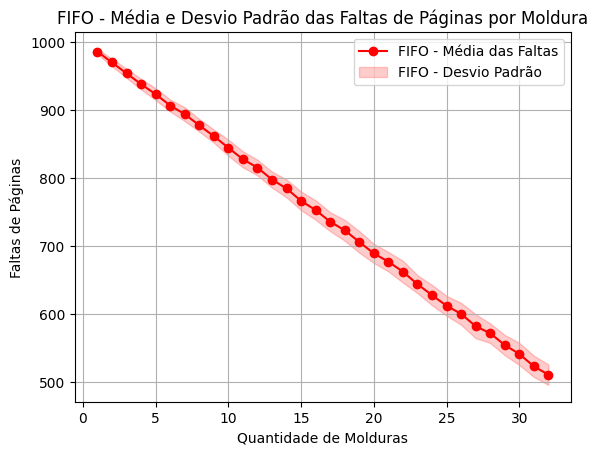

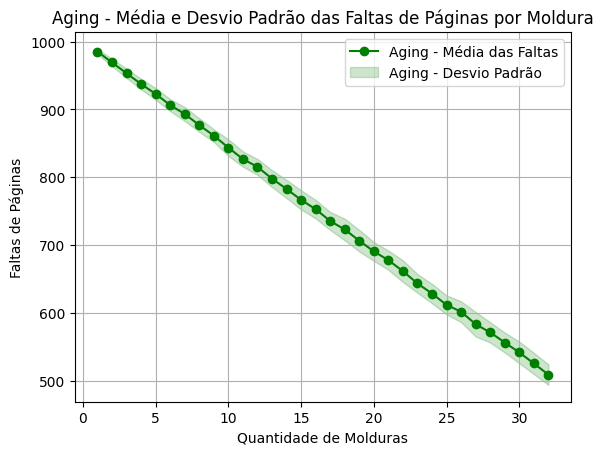

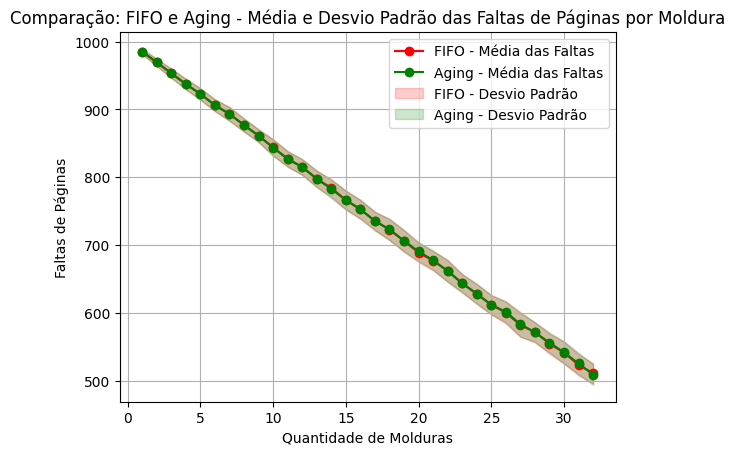

In [39]:
# Calcular as médias e desvios padrão
fifo_cor = "red"
aging_cor = "green"

medias_fifo = np.mean(m_r_fifo, axis=0)
desvios_padrao_fifo = np.std(m_r_fifo, axis=0)

medias_aging = np.mean(m_r_aging, axis=0)
desvios_padrao_aging = np.std(m_r_aging, axis=0)

print(f"medias_fifo: {medias_fifo}")
print(f"desvios_padrao_fifo: {desvios_padrao_fifo}")

print(f"medias_aging: {medias_aging}")
print(f"desvios_padrao_aging: {desvios_padrao_aging}")

# Quantidade de molduras
molduras = np.arange(1, max_molduras + 1)

# 1. Gráfico separado para FIFO
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.title('FIFO - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico separado para Aging
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gráfico combinando FIFO e Aging
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Comparação: FIFO e Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

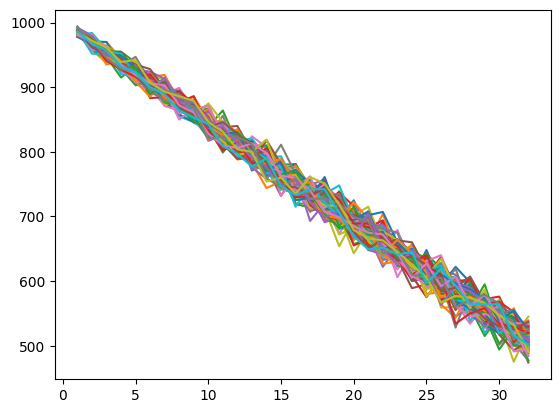

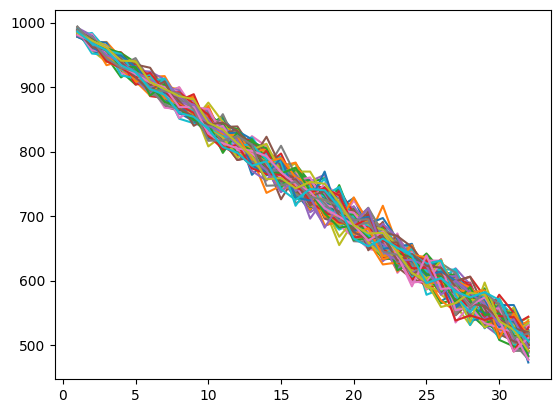

In [34]:
# plotar todas os fifos
for i in m_r_fifo:
    plt.plot(molduras, i,
            #  marker='o'
             )
plt.show()

# plotar todas os agings
for i in m_r_aging:
    plt.plot(molduras, i,
            #  marker='o'
             )
plt.show()

# Aging variando quantidade de bits para os contadores, usando as mesmas referências

In [35]:
def evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range):
    resultados = []
    for qtd_bits in bits_range:
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits)
        resultados.append(faltas)
    return resultados


In [42]:
qtd_referencias = 1000
qtd_paginas = 64
qtd_molduras = 32
max_bits = 64+1

bits_range = [i for i in range(2, max_bits)]
paginas = [i for i in range(qtd_paginas)]

referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)

{2: 521, 3: 515, 4: 509, 5: 492, 6: 497, 7: 509, 8: 488, 9: 495, 10: 500, 11: 505, 12: 501, 13: 499, 14: 507, 15: 494, 16: 502, 17: 487, 18: 496, 19: 495, 20: 501, 21: 505, 22: 515, 23: 511, 24: 509, 25: 508, 26: 508, 27: 509, 28: 506, 29: 507, 30: 507, 31: 507, 32: 507, 33: 508, 34: 508, 35: 507, 36: 506, 37: 506, 38: 507, 39: 506, 40: 506, 41: 506, 42: 506, 43: 506, 44: 506, 45: 506, 46: 506, 47: 506, 48: 506, 49: 506, 50: 506, 51: 506, 52: 506, 53: 506, 54: 506, 55: 506, 56: 506, 57: 506, 58: 506, 59: 506, 60: 506, 61: 506, 62: 506, 63: 506, 64: 506}


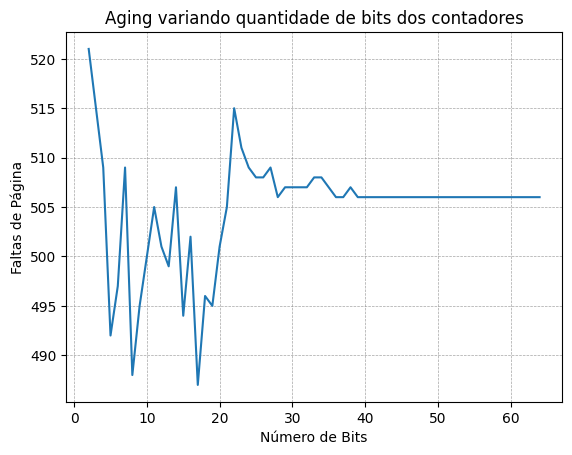

In [44]:
print(dict(zip(bits_range, resultados)))
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )
plt.xlabel('Número de Bits')
plt.ylabel('Faltas de Página')
plt.title('Aging variando quantidade de bits dos contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()